# KNN dengan PCA

**Nama  : Rizki Ardian Samudra**

**NIM   : 210411100179**

**Kelas : Penambangan Data-C**

KNN pada dasarnya adalah algoritma supervised machine learning. Dalam bahasa yang lebih sederhana ialah mencari pola dalam data yang ada untuk membuat prediksi. Prediksi tersebut bisa menjadi memprediksi harga mobil atau mengidentifikasi pelanggan mana yang akan merespons dengan baik pada kampanye pemasaran email baru.

PCA (Principal Component Analysis) pada dasarnya adalah sebuah metode statistik yang digunakan untuk mengurangi dimensi data dengan menjelaskan variasi maksimal dalam data dengan komponen-komponen utama yang baru. Metode ini bertujuan untuk merangkum informasi dari sejumlah besar variabel (fitur) dalam dataset menjadi sejumlah lebih kecil komponen utama yang independen.

Mengimport library yang diperlukan

In [135]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

Import data kita

In [136]:
df = pd.read_csv('https://gist.githubusercontent.com/rizkiardian/c27b9d4340fe70046c848bb83d3f6cc5/raw/1aa7222d046761b7b5df703e9f38063ad227aa72/IrisDatasetAsli')

jumlah_baris = df.shape[0]
df.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Mengecek nilai yang hilang/kosong pada data

In [137]:
df_copy = df.copy()
df_copy.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Mengganti nilai yang mengandung tanda tanya (?) menjadi nilai kosong

In [138]:
df_copy = df_copy.replace('?',np.nan)

Mengecek lagi berapa nilai yang kosong pada data

In [139]:
df_copy.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Setelah itu kita lihat type data pada fitur, jika type datanya bukan numerik/float maka perlu diganti type datanya

In [140]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Memisahkan fitur dan target

In [141]:
# features and target
X = df_copy[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_copy['species']

Melakukan Normalisasi Data pada Fitur dan Target

In [142]:
# Normalisasi pada X
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Normalisasi pada y
label = LabelEncoder()
y = label.fit_transform(y)

Menyimpan data normalisasi

In [143]:
# Menyimpan normalisasi ke file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Menyimpan normalisasi ke file
with open('label.pkl', 'wb') as file:
    pickle.dump(label, file)

Melihat Data yang sudah di Normalisasi

In [144]:
# Membuat DataFrame dari X dan y menggunakan pandas
liat = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
liat['target'] = y

# Menampilkan DataFrame yang digabungkan
liat.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width,target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


Membagi dataset menjadi data training dan data testing (0.8/0.2)

In [145]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## 1. Membangun model KNN

In [146]:
# Membangun model KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
knn.fit(X_train, y_train)

# Memprediksi kelas target untuk data uji
y_prediksi_knn = knn.predict(X_test)

# Menghitung akurasi prediksi
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_prediksi_knn)))

Accuracy: 1.00


In [147]:
# Membuat DataFrame dari X dan y menggunakan pandas
liat_knn = pd.DataFrame(y_test, columns=['y_test'])
liat_knn['y_prediksi_knn'] = y_prediksi_knn

# Menampilkan DataFrame yang digabungkan
liat_knn.head(jumlah_baris)

,y_test,y_prediksi_knn
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


Menyimpan model KNN

In [148]:
# Menyimpan model ke file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

Mencoba mengkategorikan target dari fitur yang diberikan

In [149]:
# Load model dari file
with open('knn_model.pkl', 'rb') as file:
    knn_loaded = pickle.load(file)

# Load normalisasi dari file
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
with open('label.pkl', 'rb') as file:
    label = pickle.load(file)

# Buat data baru
data_baru = np.array([[5.1, 3.5, 1.4, 0.2]])

# Scaling data baru menggunakan skalar yang telah dilatih sebelumnya
data_baru_scaled = scaler.fit_transform(data_baru)

# Menggunakan model untuk melakukan prediksi pada data baru
y_pred = knn_loaded.predict(data_baru_scaled)
y_pred_scaled = label.inverse_transform(y_pred)

print(y_pred_scaled)

['setosa']


## 2. Membangun model KNN dengan PCA

In [150]:
# Membangun PCA dengan 3 fitur
pca = PCA(n_components=3)
X_new=pca.fit_transform(X)

In [151]:
# Menyimpan pca ke file
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [152]:
# Split data into train and test data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.2, random_state=42, stratify=y)

In [153]:
# Membangun model KNN dengan PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
knn_pca.fit(X_train_new, y_train_new)

# Memprediksi kelas target untuk data uji
y_prediksi_knn_pca = knn_pca.predict(X_test_new)

# Menghitung akurasi prediksi
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_new, y_prediksi_knn_pca)))

Accuracy: 0.97


<ipython-input-154-986231df2854>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


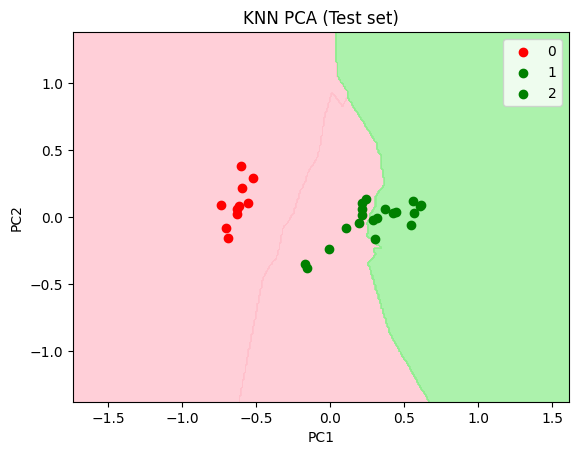

In [154]:
# Visualisasi
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test_new
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [155]:
# Membuat DataFrame dari X dan y menggunakan pandas
liat_knn_pca = pd.DataFrame(y_test_new, columns=['y_test_new'])
liat_knn_pca['y_prediksi_knn_pca'] = y_prediksi_knn_pca

# Menampilkan DataFrame yang digabungkan
liat_knn_pca.head(jumlah_baris)

,y_test_new,y_prediksi_knn_pca
0,0,0
1,2,2
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,2,2
9,1,1


Menyimpan model KNN dengan PCA

In [156]:
# Menyimpan model ke file
with open('knn_pca_model.pkl', 'wb') as file:
    pickle.dump(knn_pca, file)

Mencoba mengkategorikan target dari fitur yang diberikan

In [157]:
# Load normalisasi dari file
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
with open('label.pkl', 'rb') as file:
    label = pickle.load(file)

# Load pca dari file
with open('pca.pkl', 'rb') as file:
    pca = pickle.load(file)

# Load model dari file
with open('knn_pca_model.pkl', 'rb') as file:
    knn_pca_loaded = pickle.load(file)

# Buat data baru
data_baru = np.array([[5.1, 3.5, 1.4, 0.2]])

# Scaling data baru menggunakan skalar yang telah dilatih sebelumnya
data_baru_scaled = scaler.transform(data_baru)  # Menggunakan transform() bukan fit_transform()

# Transformasikan data baru menggunakan PCA yang telah dilatih sebelumnya
data_baru_pca = pca.transform(data_baru_scaled)  # Menggunakan transform() bukan fit_transform()

# Menggunakan model untuk melakukan prediksi pada data baru
y_pred = knn_pca_loaded.predict(data_baru_pca)
y_pred_scaled = label.inverse_transform(y_pred)

print(y_pred_scaled)

['setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
